In [1]:
# School of Information Technologies and Engineering, ADA University 
# ENCE3503 – Data & Information Engineering   
# Spring 2025 
# Team Project by Team 4 (Laman Panakhova, Jala Asadli, Mahammad Mammadli)

# # We firstly ask questions about our scraped data 
# # We answer each question by analzying and visualizing the data.
# # We clean the data and preprocess it with the EDA steps.

# DATA ANALYSIS 

Top 10 Refined Data Analysis Questions:

1. Which companies have posted the most job openings in Azerbaijan?
Explore employer activity and identify major players in the job market.

2. What are the most common job titles in the job market in Azerbaijan?
Identify trends in job demand, such as which sectors are growing.

3. How are job opportunities distributed across different locations in Azerbaijan?
Look for geographical patterns in job postings and which cities or regions have more opportunities.

4. What is the distribution of job types (e.g., Full-time, Part-time, Intern, Remote) in Azerbaijan?
Explore what types of job roles are more prevalent in the market and if there’s a growing interest in remote work.

5. What is the average salary by job category or company in Azerbaijan?
Provide insights into how much different companies or categories are paying.

6. How does the availability of jobs vary over time (based on the post date)?
Identify trends or seasonality in job postings—when is the best time to look for jobs?

7. What is the relationship between job type (Full-time, Part-time, etc.) and salary?
Do certain job types tend to offer higher salaries in Azerbaijan?

8. Which job categories have the longest and shortest deadlines for applications?
Explore whether certain industries or job roles have more urgent hiring needs.

9. How many job openings are available for remote work in Azerbaijan?
Analyze the shift toward remote or hybrid jobs and compare them with local in-office opportunities.

10. What is the correlation between job location and salary?
Are salaries higher in specific regions of Azerbaijan, or is there a geographic pattern in pay?


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df_original=pd.read_csv("hellojob_vacancies_analyzing_Copy1.csv")
df = pd.read_csv("hellojob_vacancies_analyzing.csv")

In [5]:
df.head()

,Job Title,Company Name,Location,Job Time,Category,Salary,Post Date,Deadline,Job URL,Company Logo URL
0,Aviakassir,Owl Tourism,"Bakı, Fətəli Xan Xoyski 166B",Tam-ştat,Turizm və mehmanxana işi,700 - 800 AZN,14 aprel 2025,14 may 2025,https://www.hellojob.az/vakansiya/aviakassir-9...,https://www.hellojob.az/resized/companies/e2hm...
1,Satış mütəxəssisi,SCENTPRO MMC,Bakı,Tam-ştat,Digər,600 AZN,25 aprel 2025,25 may 2025,https://www.hellojob.az/vakansiya/satis-mutexe...,https://www.hellojob.az/resized/companies/10ac...
2,Mühafizəçi,"""Lion Security"" MMC","Bakı, Qaradağ Sahil qəsəbəsi",Tam-ştat,Mühafizə xidməti,500 AZN,25 aprel 2025,25 may 2025,https://www.hellojob.az/vakansiya/muhafizeci-1...,NaN
3,Satış təmsilçisi,Emsan,Bakı,Tam-ştat,Satış üzrə mütəxəssis,400 - 1200 AZN,25 aprel 2025,25 may 2025,https://www.hellojob.az/vakansiya/satis-temsil...,https://www.hellojob.az/resized/companies/6a12...
4,Qeydiyyatçı,EDUGrata Təhsil Mərkəzi,"Bakı, Ünvan: ▪️Ramana filialı üçün adress: Ram...",Tam-ştat,Xüsusi təhsil/ Təlim,Razılaşma ilə,25 aprel 2025,25 may 2025,https://www.hellojob.az/vakansiya/qeydiyyatci-...,https://www.hellojob.az/resized/companies/7986...


In [6]:
# firstly, i replaced all empty cells with NaN values.
df.replace("", np.nan, inplace = True)
df.head()

,Job Title,Company Name,Location,Job Time,Category,Salary,Post Date,Deadline,Job URL,Company Logo URL
0,Aviakassir,Owl Tourism,"Bakı, Fətəli Xan Xoyski 166B",Tam-ştat,Turizm və mehmanxana işi,700 - 800 AZN,14 aprel 2025,14 may 2025,https://www.hellojob.az/vakansiya/aviakassir-9...,https://www.hellojob.az/resized/companies/e2hm...
1,Satış mütəxəssisi,SCENTPRO MMC,Bakı,Tam-ştat,Digər,600 AZN,25 aprel 2025,25 may 2025,https://www.hellojob.az/vakansiya/satis-mutexe...,https://www.hellojob.az/resized/companies/10ac...
2,Mühafizəçi,"""Lion Security"" MMC","Bakı, Qaradağ Sahil qəsəbəsi",Tam-ştat,Mühafizə xidməti,500 AZN,25 aprel 2025,25 may 2025,https://www.hellojob.az/vakansiya/muhafizeci-1...,NaN
3,Satış təmsilçisi,Emsan,Bakı,Tam-ştat,Satış üzrə mütəxəssis,400 - 1200 AZN,25 aprel 2025,25 may 2025,https://www.hellojob.az/vakansiya/satis-temsil...,https://www.hellojob.az/resized/companies/6a12...
4,Qeydiyyatçı,EDUGrata Təhsil Mərkəzi,"Bakı, Ünvan: ▪️Ramana filialı üçün adress: Ram...",Tam-ştat,Xüsusi təhsil/ Təlim,Razılaşma ilə,25 aprel 2025,25 may 2025,https://www.hellojob.az/vakansiya/qeydiyyatci-...,https://www.hellojob.az/resized/companies/7986...


In [7]:
missing_data = df.isnull()
missing_data.head(10)

,Job Title,Company Name,Location,Job Time,Category,Salary,Post Date,Deadline,Job URL,Company Logo URL
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True


In [8]:
# checking how many row we have in the dataframe.
len(df)

300

As we learned that there are 300 column, with the function below, we can observe columns having missing values.
Values in front of "True" shows the number of missing values in the specified column.

"Location" : 11
"Job Time" : 6
"Company Logo URL" :128

The "Company Logo URL" column has significantly high number of missing values.

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Job Title
Job Title
False    300
Name: count, dtype: int64

Company Name
Company Name
False    300
Name: count, dtype: int64

Location
Location
False    289
True      11
Name: count, dtype: int64

Job Time
Job Time
False    294
True       6
Name: count, dtype: int64

Category
Category
False    300
Name: count, dtype: int64

Salary
Salary
False    300
Name: count, dtype: int64

Post Date
Post Date
False    300
Name: count, dtype: int64

Deadline
Deadline
False    300
Name: count, dtype: int64

Job URL
Job URL
False    300
Name: count, dtype: int64

Company Logo URL
Company Logo URL
False    172
True     128
Name: count, dtype: int64



In [11]:
df = df.dropna(how='all')  # drop fully empty rows
df = df.dropna(axis=1, how='all')  # drop fully empty columns

In [12]:
df.shape

(300, 10)

In [13]:
df.columns

Index(['Job Title', 'Company Name', 'Location', 'Job Time', 'Category',
       'Salary', 'Post Date', 'Deadline', 'Job URL', 'Company Logo URL'],
      dtype='object')

In [14]:
df['Job Time'].unique()

array(['Tam-ştat', 'Təcrübəçi', nan, 'Yarım-ştat', 'Uzaqdan', 'Frilans'],
      dtype=object)

While observing, it is better to change the name of the column to describe the values more accurately.

In [16]:
df.rename(columns={'Job Time' : 'Job Type'}, inplace = True)

In [17]:
df.dropna(subset=['Job Type', 'Location'], axis=0, how='any', inplace=True)

In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
df['Company Logo URL'] = df['Company Logo URL'].fillna('Unknown')

In [20]:
df.isnull().sum()

Job Title           0
Company Name        0
Location            0
Job Type            0
Category            0
Salary              0
Post Date           0
Deadline            0
Job URL             0
Company Logo URL    0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
# remove extra spaces and standardize 'AZN' formatting
df['Salary'] = df['Salary'].str.strip().str.replace('azn', 'AZN', case=False)

# Part II: Data Processing and EDA [50]


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job Title         284 non-null    object
 1   Company Name      284 non-null    object
 2   Location          284 non-null    object
 3   Job Type          284 non-null    object
 4   Category          284 non-null    object
 5   Salary            284 non-null    object
 6   Post Date         284 non-null    object
 7   Deadline          284 non-null    object
 8   Job URL           284 non-null    object
 9   Company Logo URL  284 non-null    object
dtypes: object(10)
memory usage: 22.3+ KB


In [47]:
df.describe(include='all')

,Job Title,Company Name,Location,Job Type,Category,Salary,Post Date,Deadline,Job URL,Company Logo URL
count,284,284,284,284,284,284,284,284,284,284
unique,215,169,143,5,49,69,29,31,284,84
top,Satış təmsilçisi,ABB,Bakı,Tam-ştat,Digər,Razılaşma ilə,23 aprel 2025,23 may 2025,https://www.hellojob.az/vakansiya/aviakassir-9...,Unknown
freq,9,16,109,258,77,116,26,24,1,126


# Here we just show the data correlation between the columns to create an approximate view of the data. 

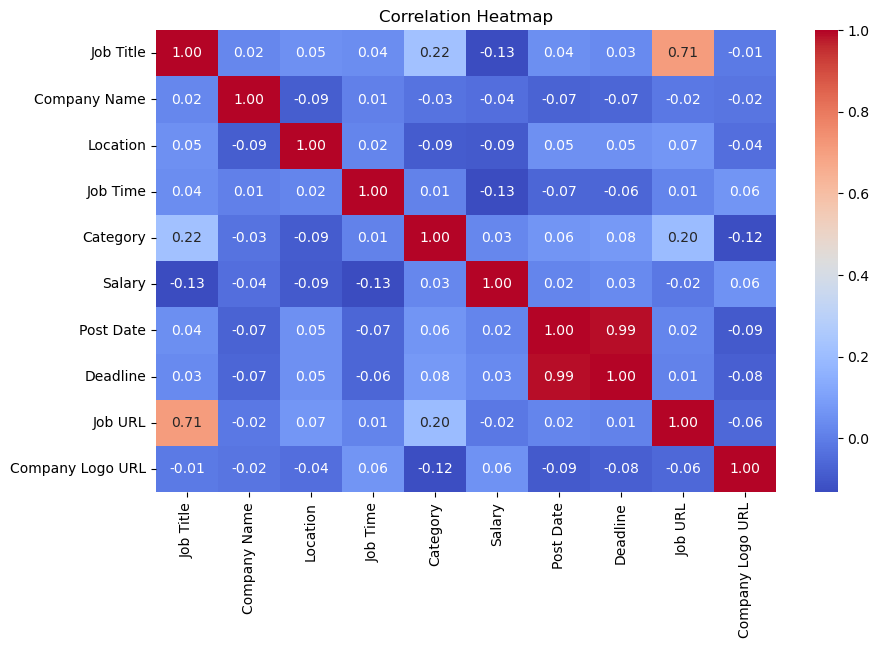

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

file_path = r'C:\Users\HP\OneDrive - ADA University\Desktop\Jupyter\Data & Info Engineering\hellojob_vacancies_final_team4.csv'
df = pd.read_csv(file_path)

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
if 'salary' in df.columns:
    df['salary'] = df['salary'].replace('[^\d]', '', regex=True).astype(float)

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

if 'category' in df.columns:
    plt.figure(figsize=(10, 4))
    df['category'].value_counts().plot(kind='bar')
    plt.title('Job Category Distribution')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

# 1. Which companies have posted the most job openings in Azerbaijan? 

To explore employer activity and identify major players in the Azerbaijani job market, we first examined the dataset using the describe() function on the Company Name column.
The output shows that the most frequently occurring company in the dataset is ABB, with a frequency of 16 job postings.
This indicates that ABB has posted the highest number of job openings among all employers represented in the dataset. Therefore, ABB can be considered one of the most active recruiters in Azerbaijan based on the current job posting data.

# 2. What are the most common job titles in the job market in Azerbaijan?

To identify trends in job demand, we analyzed the Job Title column using the describe() function.
The results show that the most common job title is "Satış təmsilçisi", which appears 9 times in the dataset.
This indicates that sales-related roles are in high demand in the Azerbaijani job market. It suggests that companies are consistently looking for sales professionals to support business growth, particularly in sectors focused on customer acquisition, retail, and business development.
This trend highlights the growing importance of sales activities across various industries in Azerbaijan.

# 3. How are job opportunities distributed across different locations in Azerbaijan?

Location Cleaning: We created a new column called Location Clean to standardize location names. This involved grouping variations of city names like "Bakı, Yasamal" or "Sumqayıt, şəhəri" under their main city names, such as "Bakı" and "Sumqayıt".

Data Visualization: We then used the value_counts() function to count the number of job postings for each location. The top 10 locations were selected for visualization.

Plotting: We plotted a bar chart using seaborn to show the distribution of job postings across the top 10 locations. The x-axis represents the number of job postings, and the y-axis shows the locations.

This analysis clearly shows that Bakı is the dominant location, with many more job postings compared to other cities.

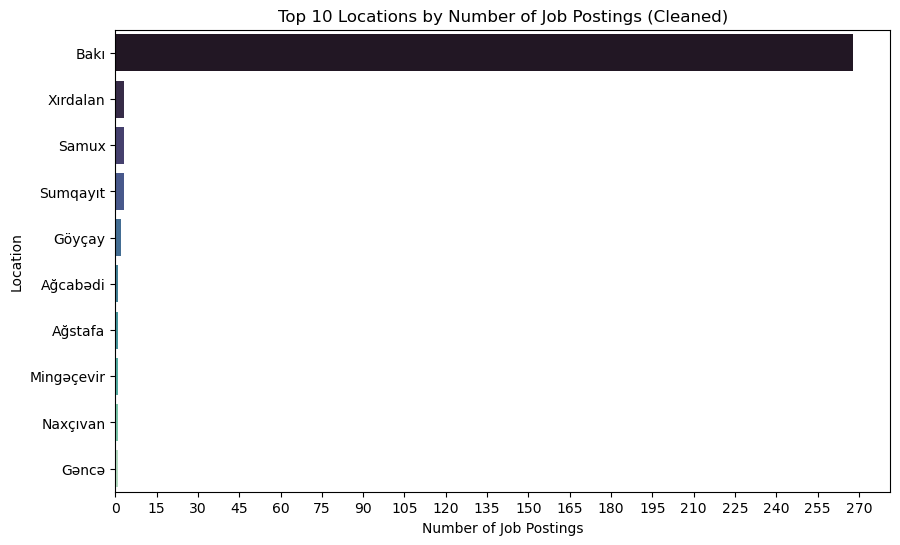

In [105]:
# a copy of the location column to not change the original 'Locaiton' column.
df['Location Clean'] = df['Location'].copy()

# if the location contains 'Bakı', the entire value is replaced with 'Bakı'
df['Location Clean'] = df['Location Clean'].apply(lambda x: 'Bakı' if 'Bakı' in x else x)
df['Location Clean'] = df['Location Clean'].apply(lambda x: 'Sumqayıt' if 'Sumqayıt' in x else x)
df['Location Clean'] = df['Location Clean'].apply(lambda x: 'Xırdalan' if 'Xırdalan' in x else x)
df['Location Clean'] = df['Location Clean'].apply(lambda x: 'Mingəçevir' if 'Mingəçevir' in x else x)
df['Location Clean'] = df['Location Clean'].apply(lambda x: 'Göyçay' if 'Göyçay' in x else x)
df['Location Clean'] = df['Location Clean'].apply(lambda x: 'Naxçıvan' if 'Naxçıvan' in x else x)
df['Location Clean'] = df['Location Clean'].apply(lambda x: 'Gəncə' if 'Gəncə' in x else x)
df['Location Clean'] = df['Location Clean'].apply(lambda x: 'Ağcabədi' if 'Ağcabədi' in x else x)
df['Location Clean'] = df['Location Clean'].apply(lambda x: 'Ağstafa' if 'Ağstafa' in x else x)

# plotting 
top_locations = df['Location Clean'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_locations.values,
    y=top_locations.index,
    palette='mako',
    hue=top_locations.index,
    dodge=False,
    legend=False
)
plt.xticks(np.arange(0, top_locations.max() + 15, 15))

plt.title('Top 10 Locations by Number of Job Postings (Cleaned)')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.show()


In [111]:
# the result in a table format for better analyzing
location_counts = df['Location Clean'].value_counts().reset_index()
location_counts.columns = ['Location', 'Job Postings']
location_counts

,Location,Job Postings
0,Bakı,268
1,Xırdalan,3
2,Samux,3
3,Sumqayıt,3
4,Göyçay,2
5,Ağcabədi,1
6,Ağstafa,1
7,Mingəçevir,1
8,Naxçıvan,1
9,Gəncə,1


# 4. What is the distribution of job types (e.g., Full-time, Part-time, Intern, Remote) in Azerbaijan? 
We analyzed the 'Job Type' column to understand the distribution of job roles in the dataset. We used the value_counts() function to count the occurrences of each job type (e.g., Full-time, Part-time, Remote, Intern). Then, We visualized the distribution using a bar plot to show how many job postings there are for each job type.
This approach gives insights into the most common job types in Azerbaijan's job market and shows whether remote work is gaining popularity.

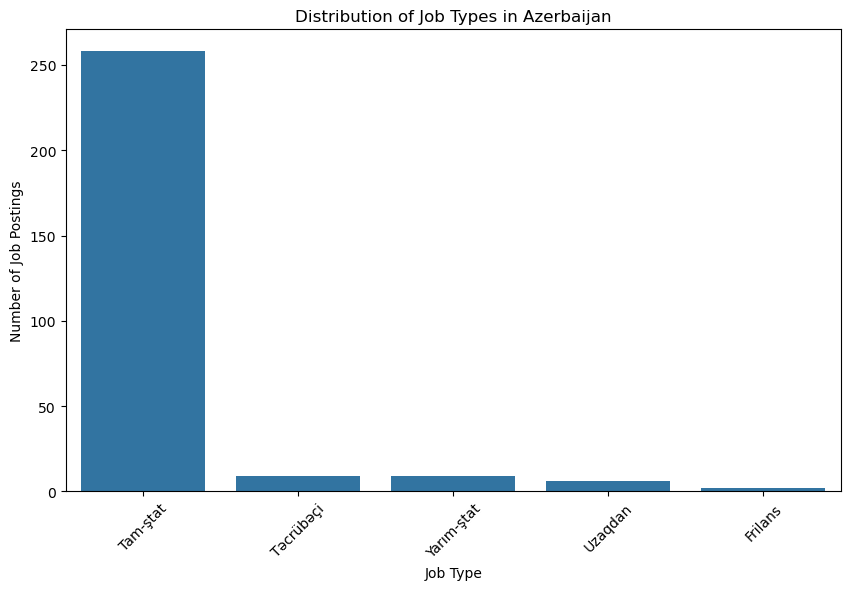

In [113]:
# the number of job postings for each job type
job_type_counts = df['Job Type'].value_counts()

# plotting 
plt.figure(figsize=(10,6))
sns.barplot(
    x=job_type_counts.index, 
    y=job_type_counts.values, 
)

plt.title('Distribution of Job Types in Azerbaijan')
plt.xlabel('Job Type')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45) 
plt.show()


In [115]:
job_type_table = df['Job Type'].value_counts().reset_index()
job_type_table.columns = ['Job Type', 'Job Postings']
job_type_table

,Job Type,Job Postings
0,Tam-ştat,258
1,Təcrübəçi,9
2,Yarım-ştat,9
3,Uzaqdan,6
4,Frilans,2


# 5. What is the average salary by job category or company in Azerbaijan?

We split the 'Salary' column into two new columns — 'Min Salary' and 'Max Salary' — to handle ranges and single salary values.
We created a new column 'Average Salary' by taking the mean of 'Min Salary' and 'Max Salary' for each job posting.
We grouped the data by the 'Category' column and calculated the average salary for each job category.
We filtered out categories with an average salary less than 5 AZN to keep only meaningful results.
Instead of a graph, we presented the final output as a sorted table showing the average salary by job category for easier analysis.


In [125]:
def split_salary(salary):
    if isinstance(salary, str):
        salary = salary.replace('AZN', '').replace(',', '').strip()
        if '-' in salary:
            min_salary, max_salary = salary.split('-')
            return float(min_salary.strip()), float(max_salary.strip())
        elif salary.lower() == 'razılaşma ilə':
            return np.nan, np.nan
        else:
            # Only one salary value given
            value = float(salary.strip())
            return value, value
    else:
        return np.nan, np.nan

df[['Min Salary', 'Max Salary']] = df['Salary'].apply(lambda x: pd.Series(split_salary(x)))

/var/folders/p4/jbcl5nrj18vg6cl4t67120tc0000gp/T/ipykernel_30276/2178094741.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


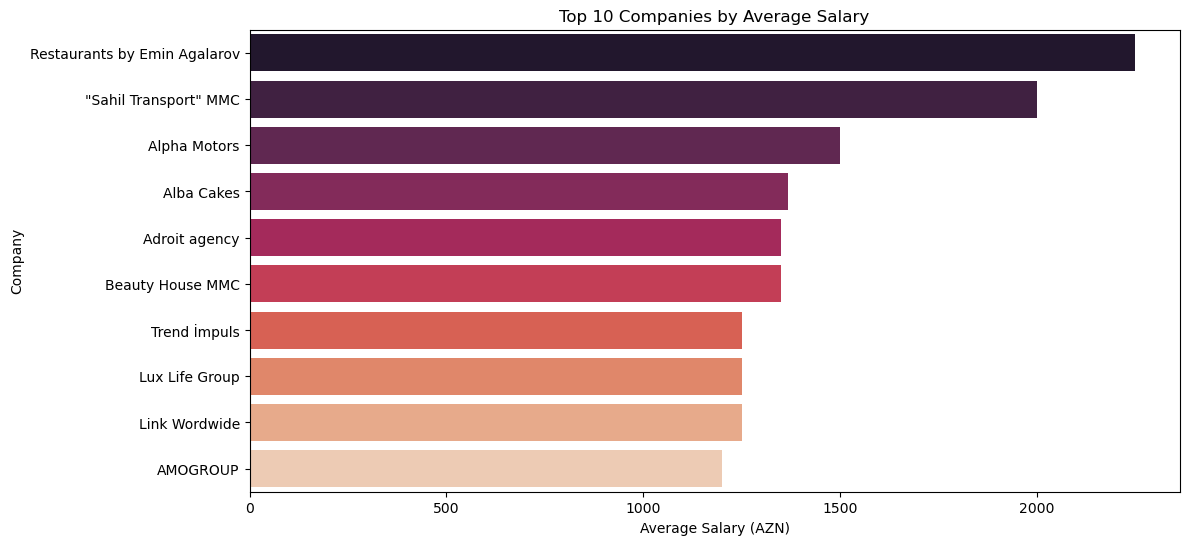

In [141]:
# a new column for average salary calculated from min and max salary columns.
df['Average Salary'] = df[['Min Salary', 'Max Salary']].mean(axis=1)

# after i get the average salary for each posting,
# i group all job postings in terms of job categories and calculate the average of the averages within each group.
average_salary_category = df.groupby('Category')['Average Salary'].mean().sort_values(ascending=False)

# now i group all job postings in terms of company names and calculate the average of the averages within each group.
average_salary_company = df.groupby('Company Name')['Average Salary'].mean().sort_values(ascending=False)

# plotting for company names
plt.figure(figsize=(12,6))
sns.barplot(
    x=average_salary_company.values[:10],
    y=average_salary_company.index[:10],
    palette='rocket'
)
plt.title('Top 10 Companies by Average Salary')
plt.xlabel('Average Salary (AZN)')
plt.ylabel('Company')
plt.show()

In [153]:
average_salary_category = average_salary_category.reset_index()
average_salary_category.columns = ['Category', 'Average Salary (AZN)']
average_salary_category

,Category,Average Salary (AZN)
0,Maliyyə,2000.000000
1,Marketinq,1300.000000
2,Həkim,1250.000000
3,Rəqəmsal marketinq,1066.666667
4,İnsan resursları,1025.000000
5,Tikinti,950.000000
6,Marketinq menecment,883.333333
7,Qrafik dizayn,870.000000
8,Menecer,862.500000
9,Hüquqşünas,850.000000


In [161]:
df[['Min Salary', 'Max Salary', 'Average Salary']] = df[['Min Salary', 'Max Salary', 'Average Salary']].fillna('Unknown')

In [163]:
df.to_csv('hellojob_vacancies_analyzing_Copy1.csv', index=False)

# 6. How does the availability of jobs vary over time (based on the post date)? Identify trends or seasonality in job postings—when is the best time to look for jobs?

We translated Azerbaijani month names into English to ensure consistent date parsing.
We converted the 'Post Date' and 'Deadline' columns into proper datetime formats.
We grouped job postings by month and counted the number of jobs posted each month.
We extracted the year and month from the 'Post Date' to analyze trends over multiple years.
We sorted the months in natural calendar order (January, February, etc.) to properly visualize seasonal patterns.
We plotted a line graph showing how job postings change month-by-month for each year.
We identified and highlighted the month with the highest number of job postings to pinpoint the best time to search for jobs.
We concluded by stating which month and year had the peak number of job postings, based on the data.

Jobs posted over time (monthly):
Post Date
2025-03     14
2025-04    270
Freq: M, dtype: int64


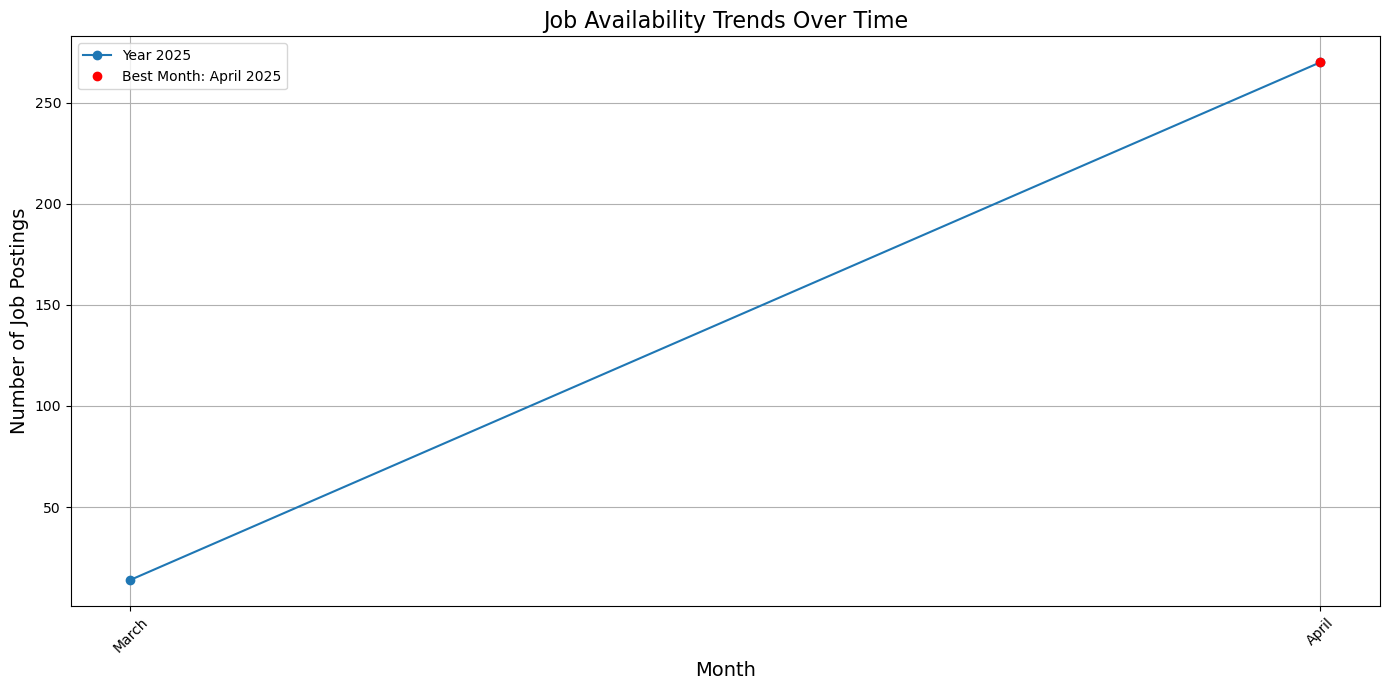

The best time to look for jobs is in April 2025, with 270 job postings.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\HP\OneDrive - ADA University\Desktop\Jupyter\Data & Info Engineering\hellojob_vacancies_analyzing_Copy1.csv'
df = pd.read_csv(file_path)

# Translate Azerbaijani months to English
month_translation = {
    'yanvar': 'January', 'fevral': 'February', 'mart': 'March', 'aprel': 'April',
    'may': 'May', 'iyun': 'June', 'iyul': 'July', 'avqust': 'August',
    'sentyabr': 'September', 'oktyabr': 'October', 'noyabr': 'November', 'dekabr': 'December'
}

for az, en in month_translation.items():
    df['Post Date'] = df['Post Date'].str.replace(az, en, regex=False)
    df['Deadline'] = df['Deadline'].str.replace(az, en, regex=False)

# Convert 'Post Date' and 'Deadline' to datetime
df['Post Date'] = pd.to_datetime(df['Post Date'], format='%d %B %Y')
df['Deadline'] = pd.to_datetime(df['Deadline'], format='%d %B %Y')

# Fix salaries: Replace 'Unknown' with NaN, then convert to float
df['Min Salary'] = pd.to_numeric(df['Min Salary'], errors='coerce')
df['Max Salary'] = pd.to_numeric(df['Max Salary'], errors='coerce')
df['Average Salary'] = pd.to_numeric(df['Average Salary'], errors='coerce')

# Group jobs by month
jobs_over_time = df.groupby(df['Post Date'].dt.to_period('M')).size()

# Print the number of job postings over time (monthly)
print("Jobs posted over time (monthly):")
print(jobs_over_time)

# Extract year and month from 'Post Date'
df['Post Year'] = df['Post Date'].dt.year
df['Post Month'] = df['Post Date'].dt.month
df['Post Month Name'] = df['Post Date'].dt.strftime('%B')

# Group by Year and Month
monthly_job_counts = df.groupby(['Post Year', 'Post Month Name']).size().reset_index(name='Job Count')

# Order months correctly (January, February, ..., December)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_job_counts['Post Month Name'] = pd.Categorical(monthly_job_counts['Post Month Name'],
                                                       categories=month_order, ordered=True)
monthly_job_counts = monthly_job_counts.sort_values(['Post Year', 'Post Month Name'])

# Plotting job trends over time
plt.figure(figsize=(14,7))
for year in monthly_job_counts['Post Year'].unique():
    data = monthly_job_counts[monthly_job_counts['Post Year'] == year]
    plt.plot(data['Post Month Name'], data['Job Count'], marker='o', label=f'Year {year}')

# Highlight the best month
best_month = monthly_job_counts.loc[monthly_job_counts['Job Count'].idxmax()]
plt.plot(best_month['Post Month Name'], best_month['Job Count'], 'ro', label=f"Best Month: {best_month['Post Month Name']} {int(best_month['Post Year'])}")

# Titles and labels
plt.title('Job Availability Trends Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Job Postings', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Output the best month with the highest job postings
print(f"The best time to look for jobs is in {best_month['Post Month Name']} {int(best_month['Post Year'])}, with {best_month['Job Count']} job postings.")


# 7. What is the relationship between job type (Full-time, Part-time, etc.) and salary? Do certain job types tend to offer higher salaries in Azerbaijan?

We grouped the dataset by the 'Job Type' column and calculated the average 'Average Salary' for each job type.
We sorted the results in descending order to easily identify which job types offer the highest average salaries.
We presented the findings both as a printed table for quick reference and as a bar chart for better visual comparison.
The plot helps highlight trends — for example, whether Full-time positions generally offer higher salaries compared to Part-time or Remote jobs.

Average Salary by Job Type:
Job Type
Uzaqdan       787.500000
Tam-ştat      757.337662
Təcrübəçi     700.000000
Yarım-ştat    595.714286
Frilans              NaN
Name: Average Salary, dtype: float64


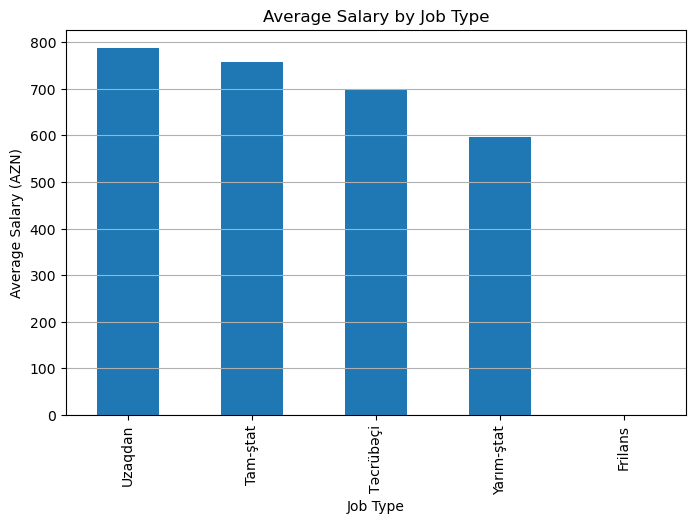

In [11]:
# Group by Job Type
salary_by_job_type = df.groupby('Job Type')['Average Salary'].mean().sort_values(ascending=False)

# Print
print("Average Salary by Job Type:")
print(salary_by_job_type)

# Plot
salary_by_job_type.plot(kind='bar', title='Average Salary by Job Type', figsize=(8,5))
plt.ylabel('Average Salary (AZN)')
plt.grid(axis='y')
plt.show()


# 8. Which job categories have the longest and shortest deadlines for applications? Explore whether certain industries or job roles have more urgent hiring needs.

We calculated the number of days between each job's 'Post Date' and 'Deadline' to determine the time applicants have to apply.
We created a new column called 'Days to Deadline' representing this difference in days.
We grouped the data by the 'Category' column and calculated the average 'Days to Deadline' for each job category.
We sorted the categories to easily identify which industries tend to have shorter or longer application periods.
We printed out:
The full table showing the average days to deadline by category.
The top 5 categories with the shortest deadlines (more urgent hiring needs).
The top 5 categories with the longest deadlines (more relaxed timelines).

In [12]:
# Calculate how many days between Post Date and Deadline
df['Days to Deadline'] = (df['Deadline'] - df['Post Date']).dt.days

# Group by Category
deadline_by_category = df.groupby('Category')['Days to Deadline'].mean().sort_values()

# Print
print("Average Days to Deadline by Category:")
print(deadline_by_category)

# Shortest and Longest
print("\nCategories with Shortest Deadlines:")
print(deadline_by_category.head(5))

print("\nCategories with Longest Deadlines:")
print(deadline_by_category.tail(5))


Average Days to Deadline by Category:
Category
Maliyyə analiz                 21.000000
Texnologiya                    27.571429
Xidmət                         27.750000
Proqramlaşdırma                28.000000
Kredit mütəxəssisi             29.333333
Anbardar                       30.000000
Operator                       30.000000
Qrafik dizayn                  30.000000
Restoran işi                   30.000000
SMM                            30.000000
Satış                          30.000000
Sistem idarəetməsi             30.000000
Sığorta                        30.000000
İnsan resursları               30.000000
Tibb təmsilçisi                30.000000
Tibbi personal                 30.000000
Təhsil və elm                  30.000000
Xadimə                         30.000000
Xüsusi təhsil/ Təlim           30.000000
İT mütəxəssisi / məsləhətçi    30.000000
İctimaiyyətlə əlaqələr (PR)    30.000000
Sürücü                         30.000000
Ofis menecmenti                30.000000
Ofisiant  

# 9. How many job openings are available for remote work in Azerbaijan? Analyze the shift toward remote or hybrid jobs and compare them with local in-office opportunities.

We created a new column called 'Work Type' based on the 'Location' field, categorizing jobs as either 'Remote' or 'Onsite'.
We classified any location containing the word "remote" (case-insensitive) as 'Remote'; all others were treated as 'Onsite'.
We counted the number of Remote and Onsite job openings to understand the distribution.
We visualized the comparison using a pie chart to show the percentage split between Remote and Onsite jobs.
We also printed the exact counts of each work type to provide a precise breakdown of job availability.

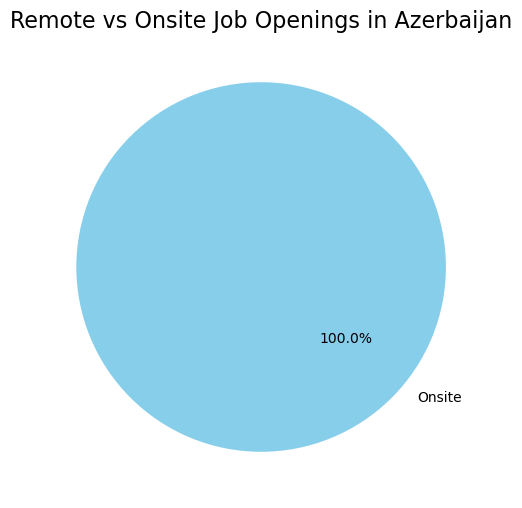

Onsite    284
Name: Work Type, dtype: int64


In [13]:
# Create a new column: Remote vs Onsite
df['Work Type'] = df['Location'].apply(lambda x: 'Remote' if 'remote' in x.lower() else 'Onsite')

# Count remote vs onsite
work_type_counts = df['Work Type'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(work_type_counts, labels=work_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Remote vs Onsite Job Openings in Azerbaijan', fontsize=16)
plt.show()

# Print exact numbers
print(work_type_counts)


# 10. What is the correlation between job location and salary? Are salaries higher in specific regions of Azerbaijan, or is there a geographic pattern in pay?

We grouped the dataset by the 'Location Clean' column and calculated the average 'Average Salary' for each location.
We sorted the locations in descending order to quickly identify the regions offering the highest average salaries.
We printed a table showing the average salary by location for detailed analysis.
We created a bar chart to visually highlight geographic salary patterns across Azerbaijan.
This analysis helps reveal whether certain cities or regions consistently offer higher-paying job opportunities compared to others.

Average Salary by Location:
Location Clean
Mingəçevir    1000.000000
Bakı           753.374233
Sumqayıt       725.000000
Samux          400.000000
Xırdalan       400.000000
Ağcabədi              NaN
Ağstafa               NaN
Göyçay                NaN
Gəncə                 NaN
Naxçıvan              NaN
Name: Average Salary, dtype: float64


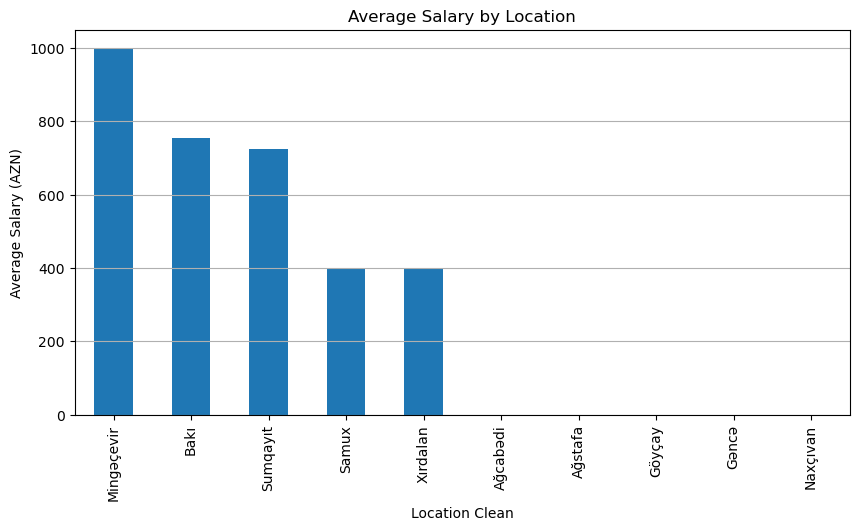

In [14]:
# Group by Location Clean
salary_by_location = df.groupby('Location Clean')['Average Salary'].mean().sort_values(ascending=False)

# Print
print("Average Salary by Location:")
print(salary_by_location)

# Plot
salary_by_location.plot(kind='bar', figsize=(10,5), title='Average Salary by Location')
plt.ylabel('Average Salary (AZN)')
plt.grid(axis='y')
plt.show()
